<a href="https://colab.research.google.com/github/pcashman21/feral-cat-census/blob/main/notebooks/yolo/train_yolo_pose_estimation_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook

In [1]:
!mkdir data3

In [2]:
!unzip feral-cat-pose-detection-7.v2i.yolov8.zip

Archive:  feral-cat-pose-detection-7.v2i.yolov8.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/group0002_jpeg_cat-0_png.rf.691f3f3b3c57aa2fca7d370494eb83c2.jpg  
 extracting: test/images/group0002_jpeg_cat-5_png.rf.d0b5e81ce12ca477ef49c5b8db7dabe2.jpg  
 extracting: test/images/group0002_jpeg_cat-7_png.rf.e7f0105781ec303356b3a96706936ddf.jpg  
 extracting: test/images/group0053_jpeg_cat-3_png.rf.032ee371927293ebe5a3c30298d77912.jpg  
 extracting: test/images/group0058_jpeg_cat-1_png.rf.7f289fa99dec3036b7aef78f1638a068.jpg  
 extracting: test/images/group0099_jpeg_cat-0_png.rf.e80c1e0b592e511dc90fe031ae570a13.jpg  
 extracting: test/images/group0103_jpeg_cat-0_png.rf.17bcfe83ff52514f121e31665e7393f9.jpg  
 extracting: test/images/group0107_png_cat-3_png.rf.c1e365cd6b66642b1cc297b47b151323.jpg  
 extracting: test/images/group0127_jpeg_cat-2_png.rf.c

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 689.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.1/871.1 kB 16.9 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

In [5]:
!cat /content/data3/data.yaml

train: /content/train/images
val: /content/valid/images
test: /content/test/images

kpt_shape: [6, 3]
flip_idx: [0, 1, 2, 3, 4, 5]

nc: 1
names: ['cat']

roboflow:
  workspace: feralcatposeestimation
  project: feral-cat-pose-detection-7
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/feralcatposeestimation/feral-cat-pose-detection-7/dataset/2


In [6]:
model = YOLO('yolov8m-pose.yaml')  # build a new model from YAML
project = '/content/data3/results'
name = '200-epochs-'

results = model.train(data='/content/data3/data.yaml', epochs=200, project=project, name=name, patience=40, batch=4, imgsz=640)

Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=pose, mode=train, model=yolov8m-pose.yaml, data=/content/data3/data.yaml, epochs=200, time=None, patience=40, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/data3/results, name=200-epochs-, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

100%|██████████| 755k/755k [00:00<00:00, 19.4MB/s]


Overriding model.yaml kpt_shape=[17, 3] with kpt_shape=[6, 3]

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  

100%|██████████| 6.25M/6.25M [00:00<00:00, 94.4MB/s]


AMP: checks passed ✅


/usr/local/lib/python3.10/dist-packages/ultralytics/engine/trainer.py:268: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning /content/train/labels... 210 images, 0 backgrounds, 0 corrupt: 100%|██████████| 210/210 [00:00<00:00, 1733.58it/s]

train: New cache created: /content/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/valid/labels... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<00:00, 1473.49it/s]

val: New cache created: /content/valid/labels.cache



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Plotting labels to /content/data3/results/200-epochs-/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 83 weight(decay=0.0), 93 weight(decay=0.0005), 92 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/data3/results/200-epochs-
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      1/200      2.51G      3.026      3.897     0.7132      2.912      4.145          7        640: 100%|██████████| 53/53 [00:27<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.65it/s]

                   all         60         60    0.00333          1      0.116     0.0231    0.00333          1      0.285      0.123



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      2/200      2.15G       2.93      3.445     0.6871      2.846      3.963          6        640: 100%|██████████| 53/53 [00:22<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.86it/s]

                   all         60         60     0.0142          1       0.03    0.00793     0.0599        0.3     0.0441     0.0146



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      3/200      2.26G      2.748      3.312     0.6666      2.681      3.737          6        640: 100%|██████████| 53/53 [00:24<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.74it/s]

                   all         60         60      0.265      0.967      0.951      0.216      0.146      0.533      0.187      0.044



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      4/200      2.15G      2.589      3.638     0.6619      2.658      3.535          8        640: 100%|██████████| 53/53 [00:22<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.56it/s]

                   all         60         60      0.429      0.589       0.53      0.146      0.232      0.333      0.215     0.0838



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      5/200      2.25G      2.526      3.421     0.6497      2.616      3.339          9        640: 100%|██████████| 53/53 [00:19<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.60it/s]

                   all         60         60      0.473       0.55      0.507      0.139      0.181      0.283      0.173     0.0671



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      6/200      2.25G      2.334      3.261     0.6143      2.532      3.105          4        640: 100%|██████████| 53/53 [00:18<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.73it/s]

                   all         60         60      0.421      0.702       0.59      0.291      0.197      0.494      0.234     0.0954



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      7/200      2.25G      2.188      3.147      0.603      2.405      2.943          6        640: 100%|██████████| 53/53 [00:23<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.65it/s]

                   all         60         60      0.629        0.4      0.435      0.185      0.242      0.217      0.231     0.0859



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      8/200      2.25G      2.105      3.136     0.6104      2.342      2.808          6        640: 100%|██████████| 53/53 [00:23<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.89it/s]

                   all         60         60      0.624      0.747      0.699      0.368      0.376      0.462      0.301      0.127



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      9/200      2.25G      1.998       3.27     0.5941      2.341      2.736          6        640: 100%|██████████| 53/53 [00:24<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.63it/s]

                   all         60         60      0.647      0.733      0.754      0.591      0.394       0.45      0.328      0.124



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     10/200      2.24G      1.953      3.331      0.612      2.239      2.613          4        640: 100%|██████████| 53/53 [00:18<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.27it/s]

                   all         60         60       0.78      0.709       0.83      0.566      0.255      0.567      0.252      0.101



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     11/200      2.23G      1.845       3.23     0.5885      2.168      2.553          3        640: 100%|██████████| 53/53 [00:17<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.85it/s]

                   all         60         60      0.234      0.467      0.251      0.102      0.166      0.549      0.176     0.0628



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     12/200      2.25G      1.841      3.217     0.6293      2.091      2.534          7        640: 100%|██████████| 53/53 [00:23<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.66it/s]

                   all         60         60      0.749       0.75      0.775       0.49      0.299      0.367      0.258     0.0995



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     13/200      2.25G      1.846      3.133     0.6016      2.041       2.49          6        640: 100%|██████████| 53/53 [00:21<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.71it/s]

                   all         60         60      0.622      0.783      0.762      0.449      0.164      0.583      0.202     0.0923



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     14/200      2.24G      1.723      3.167     0.5999      2.003      2.368          7        640: 100%|██████████| 53/53 [00:21<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.06it/s]

                   all         60         60        0.3      0.983      0.625      0.391       0.22      0.767      0.245      0.108



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     15/200      2.24G      1.667      3.105     0.6023      1.955      2.361          8        640: 100%|██████████| 53/53 [00:25<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.64it/s]

                   all         60         60       0.42      0.767      0.572      0.389      0.198      0.567      0.229        0.1



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     16/200      2.25G      1.655      3.248     0.5976      1.883      2.324          8        640: 100%|██████████| 53/53 [00:25<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.44it/s]

                   all         60         60      0.347       0.95        0.7       0.53      0.205      0.617      0.233      0.116



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     17/200      2.25G      1.613      2.946     0.5898      1.873      2.244          6        640: 100%|██████████| 53/53 [00:22<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.67it/s]

                   all         60         60      0.692        0.8      0.878        0.7      0.288      0.467      0.283      0.109



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     18/200      2.24G      1.628      2.975     0.5886      1.846      2.288          6        640: 100%|██████████| 53/53 [00:21<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]

                   all         60         60      0.852      0.733      0.892      0.705      0.287      0.583      0.331       0.14



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     19/200      2.25G      1.569      2.964     0.5941      1.734      2.235          5        640: 100%|██████████| 53/53 [00:22<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.43it/s]

                   all         60         60      0.783      0.967      0.944       0.77      0.345      0.483      0.308      0.119



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     20/200      2.15G      1.576      2.953     0.5728      1.744      2.202          7        640: 100%|██████████| 53/53 [00:24<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.57it/s]

                   all         60         60      0.499      0.683      0.684      0.497      0.307        0.5      0.315     0.0984



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     21/200      2.24G      1.483      3.133     0.6033      1.676      2.135          5        640: 100%|██████████| 53/53 [00:22<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.86it/s]

                   all         60         60      0.628      0.867       0.91      0.688      0.351      0.517       0.39      0.147



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     22/200      2.24G      1.451      3.078      0.573      1.603      2.104          6        640: 100%|██████████| 53/53 [00:16<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.86it/s]

                   all         60         60      0.883      0.817      0.938      0.784      0.378      0.467      0.322      0.125



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     23/200      2.25G      1.478        3.2     0.6066      1.617      2.092          5        640: 100%|██████████| 53/53 [00:23<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.04it/s]

                   all         60         60          1       0.96      0.991      0.876      0.457      0.449       0.31      0.126



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     24/200      2.25G      1.426      3.178     0.5899      1.607      2.088          6        640: 100%|██████████| 53/53 [00:22<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.67it/s]

                   all         60         60      0.892       0.75      0.918      0.768      0.372      0.583       0.32      0.119



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     25/200      2.24G      1.397       3.02     0.5837      1.613      2.043          4        640: 100%|██████████| 53/53 [00:23<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.76it/s]

                   all         60         60      0.979      0.785      0.927      0.819      0.402       0.35       0.29      0.131



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     26/200      2.24G      1.341      3.137     0.5808        1.6      1.988          5        640: 100%|██████████| 53/53 [00:18<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.54it/s]

                   all         60         60      0.664      0.667      0.746      0.609      0.262      0.433      0.259      0.106



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     27/200      2.25G      1.365      3.013     0.5598      1.598      1.981          5        640: 100%|██████████| 53/53 [00:23<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.95it/s]

                   all         60         60      0.976      0.783      0.887      0.849      0.395        0.4      0.284      0.132



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     28/200      2.24G      1.302      3.107     0.5863      1.551      1.966          6        640: 100%|██████████| 53/53 [00:25<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.84it/s]

                   all         60         60          1      0.887      0.952      0.843      0.415      0.366      0.317      0.131



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     29/200      2.24G      1.296      3.285      0.578      1.589      1.985          7        640: 100%|██████████| 53/53 [00:24<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.86it/s]

                   all         60         60       0.94      0.782      0.897      0.765      0.314       0.45      0.299      0.114



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     30/200      2.23G      1.254      3.065     0.5562      1.563      1.916          8        640: 100%|██████████| 53/53 [00:25<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.63it/s]

                   all         60         60      0.927      0.817      0.914      0.857      0.278      0.583      0.307       0.12



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     31/200      2.24G      1.257      2.861     0.5535       1.56      1.897          7        640: 100%|██████████| 53/53 [00:21<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.64it/s]

                   all         60         60      0.889      0.802      0.904       0.82      0.337      0.517      0.316      0.109



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     32/200      2.24G      1.239      2.867     0.5441      1.546      1.872          7        640: 100%|██████████| 53/53 [00:22<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]

                   all         60         60      0.977      0.783      0.889      0.799       0.38       0.45      0.312      0.116



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     33/200      2.24G      1.208      2.827      0.551      1.517      1.855          8        640: 100%|██████████| 53/53 [00:20<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.64it/s]

                   all         60         60          1      0.616      0.815       0.72      0.333      0.433      0.305      0.121



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     34/200      2.25G      1.229       2.91     0.5493      1.483      1.846          6        640: 100%|██████████| 53/53 [00:23<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.64it/s]

                   all         60         60      0.983      0.683      0.869      0.766      0.551      0.333      0.404      0.126



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     35/200      2.24G      1.223      2.908     0.5588      1.484       1.82          4        640: 100%|██████████| 53/53 [00:24<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.69it/s]

                   all         60         60      0.998      0.867      0.957      0.892       0.45       0.45      0.362      0.149



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     36/200      2.15G      1.212       2.85     0.5619      1.486      1.794          6        640: 100%|██████████| 53/53 [00:19<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.66it/s]

                   all         60         60      0.795      0.713      0.826       0.63      0.351      0.477      0.377      0.179



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     37/200      2.23G      1.169      3.306      0.555      1.507      1.787          8        640: 100%|██████████| 53/53 [00:25<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.64it/s]

                   all         60         60      0.856      0.733       0.88      0.742      0.388      0.454      0.369       0.16



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     38/200      2.25G      1.093      2.949     0.5523      1.446      1.715          8        640: 100%|██████████| 53/53 [00:22<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.82it/s]

                   all         60         60       0.83        0.5      0.649      0.531      0.336      0.483      0.351      0.132



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     39/200      2.25G      1.042      3.027      0.543      1.316      1.639          5        640: 100%|██████████| 53/53 [00:17<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.73it/s]

                   all         60         60      0.938      0.756      0.925      0.817      0.527       0.39      0.428      0.144



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     40/200      2.24G     0.9856       3.06     0.5384      1.187      1.627          5        640: 100%|██████████| 53/53 [00:23<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.62it/s]

                   all         60         60      0.869      0.663      0.754      0.555        0.5       0.35       0.34      0.125



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     41/200      2.23G     0.9369      3.085     0.5481      1.141      1.598          6        640: 100%|██████████| 53/53 [00:21<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.62it/s]

                   all         60         60      0.822       0.77      0.883      0.709      0.462      0.467      0.381      0.163



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     42/200      2.24G     0.8892      2.918     0.5617      1.139      1.541          8        640: 100%|██████████| 53/53 [00:24<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.70it/s]

                   all         60         60      0.496       0.69      0.534      0.364      0.274      0.583      0.285      0.114



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     43/200      2.24G     0.8723      3.216     0.5668      1.076      1.504          4        640: 100%|██████████| 53/53 [00:24<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.67it/s]

                   all         60         60      0.585      0.667      0.615      0.467      0.315        0.5      0.285      0.114



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     44/200      2.24G     0.8416      2.993     0.5491      1.028      1.469          7        640: 100%|██████████| 53/53 [00:22<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.47it/s]

                   all         60         60      0.949      0.936      0.982      0.865      0.492        0.5      0.417      0.131



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     45/200      2.25G     0.7832      3.246     0.5761     0.9442      1.422          8        640: 100%|██████████| 53/53 [00:25<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]

                   all         60         60      0.928      0.917      0.971      0.842      0.422      0.483      0.392      0.136



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     46/200      2.25G     0.7544      3.067     0.5594     0.8972      1.399          8        640: 100%|██████████| 53/53 [00:22<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.31it/s]

                   all         60         60      0.886      0.717      0.867      0.723      0.398      0.551       0.36      0.131



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     47/200      2.24G     0.7752      3.213     0.5279     0.8621      1.408          4        640: 100%|██████████| 53/53 [00:21<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.85it/s]

                   all         60         60      0.945      0.917      0.966      0.828      0.423      0.517      0.367      0.128



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     48/200      2.23G     0.7932       2.81      0.535     0.8754      1.395          8        640: 100%|██████████| 53/53 [00:21<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.60it/s]

                   all         60         60      0.929      0.983      0.981      0.878      0.447      0.483      0.398      0.134



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     49/200      2.24G     0.6842      3.013     0.5465     0.7833      1.339          8        640: 100%|██████████| 53/53 [00:22<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.61it/s]

                   all         60         60      0.981       0.88      0.984      0.916      0.512      0.472      0.413      0.149



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     50/200      2.25G     0.6882      3.026     0.5498     0.7965      1.336          6        640: 100%|██████████| 53/53 [00:24<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.68it/s]

                   all         60         60          1      0.899      0.985      0.921      0.538      0.533      0.438      0.156



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     51/200      2.25G     0.6694      3.123     0.5428     0.8056      1.337          6        640: 100%|██████████| 53/53 [00:23<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.82it/s]

                   all         60         60      0.923      0.997       0.99      0.943      0.499        0.5      0.391      0.132



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     52/200      2.19G     0.6925      2.987     0.5339     0.7905      1.305          4        640: 100%|██████████| 53/53 [00:22<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.55it/s]

                   all         60         60       0.89      0.945      0.967      0.925      0.479       0.45      0.342      0.128



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     53/200      2.24G       0.61      3.223      0.528     0.7361      1.279          6        640: 100%|██████████| 53/53 [00:22<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.72it/s]

                   all         60         60      0.967      0.982      0.992      0.948      0.476      0.467      0.355      0.129



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     54/200      2.24G     0.6093      2.949     0.5499     0.7099      1.273          8        640: 100%|██████████| 53/53 [00:19<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.54it/s]

                   all         60         60      0.902       0.92      0.958      0.849      0.484      0.483      0.415      0.171



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     55/200      2.24G     0.6367      2.898     0.5539      0.754      1.287          4        640: 100%|██████████| 53/53 [00:24<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.86it/s]

                   all         60         60      0.933          1      0.989      0.918      0.504        0.5      0.419      0.148



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     56/200      2.25G     0.5796       2.99     0.5485     0.6871      1.238          8        640: 100%|██████████| 53/53 [00:22<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.84it/s]

                   all         60         60        0.9      0.967      0.971      0.849      0.482      0.567      0.404      0.149



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     57/200      2.25G     0.5588      2.937     0.5488     0.6453      1.222          8        640: 100%|██████████| 53/53 [00:19<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.51it/s]

                   all         60         60      0.919      0.983      0.989      0.905      0.447       0.45       0.34      0.146



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     58/200      2.25G     0.5965      2.621     0.5456     0.6607      1.236          6        640: 100%|██████████| 53/53 [00:23<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.68it/s]

                   all         60         60      0.936       0.97      0.985      0.903      0.452      0.483      0.406      0.156



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     59/200      2.24G     0.5501        2.9       0.56     0.6557      1.203          6        640: 100%|██████████| 53/53 [00:14<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.63it/s]

                   all         60         60       0.95          1      0.992      0.971      0.582      0.483      0.469      0.165



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     60/200      2.24G     0.5133       2.83     0.5302     0.6151      1.186          8        640: 100%|██████████| 53/53 [00:21<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.61it/s]

                   all         60         60      0.942       0.95      0.986       0.95      0.437      0.467      0.373      0.136



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     61/200      2.24G     0.5119      2.986      0.535     0.5574      1.166          6        640: 100%|██████████| 53/53 [00:21<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.74it/s]

                   all         60         60      0.977      0.983      0.993      0.949      0.418        0.4      0.303      0.103



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     62/200      2.25G     0.5204      2.868     0.5498     0.5904      1.202          5        640: 100%|██████████| 53/53 [00:23<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.62it/s]

                   all         60         60      0.951      0.979      0.992      0.949      0.382      0.433      0.258     0.0829



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     63/200      2.24G     0.5042      3.001     0.5344     0.5649      1.172          6        640: 100%|██████████| 53/53 [00:25<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.67it/s]

                   all         60         60       0.98      0.983      0.993      0.964      0.481      0.483      0.294     0.0957



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     64/200      2.25G     0.4965      2.974     0.5371      0.572      1.156          3        640: 100%|██████████| 53/53 [00:23<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.30it/s]

                   all         60         60       0.98      0.983      0.993      0.943      0.448       0.45      0.345      0.126



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     65/200      2.25G     0.4846       2.88     0.5446     0.5724      1.177          7        640: 100%|██████████| 53/53 [00:20<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all         60         60       0.98      0.967      0.992      0.927      0.456       0.45      0.323      0.112



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     66/200      2.25G     0.4593       2.89     0.5262     0.5286      1.154          7        640: 100%|██████████| 53/53 [00:17<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.64it/s]

                   all         60         60      0.966      0.942      0.987      0.933      0.451       0.45      0.309      0.109



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     67/200      2.24G      0.442      2.882     0.5344     0.5054      1.128          8        640: 100%|██████████| 53/53 [00:25<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.66it/s]

                   all         60         60      0.975          1      0.995       0.97      0.435       0.45      0.328      0.123



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     68/200      2.18G      0.464       2.93     0.5544     0.5188      1.143          3        640: 100%|██████████| 53/53 [00:23<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.18it/s]

                   all         60         60      0.965          1      0.993      0.977       0.48        0.5      0.361      0.101



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     69/200      2.25G     0.4541      2.837     0.5299     0.5213      1.128          7        640: 100%|██████████| 53/53 [00:19<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.08it/s]

                   all         60         60      0.984      0.983      0.993      0.971      0.436      0.467      0.315     0.0995



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     70/200      2.24G     0.4562      2.901     0.5268     0.4933      1.129          3        640: 100%|██████████| 53/53 [00:23<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.64it/s]

                   all         60         60      0.981      0.967      0.987       0.95      0.403      0.433      0.291      0.103



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     71/200      2.24G     0.4275      3.061     0.5476     0.4825       1.12          6        640: 100%|██████████| 53/53 [00:21<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.64it/s]

                   all         60         60      0.966      0.983      0.993      0.949      0.441       0.45      0.282     0.0956



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     72/200      2.24G     0.4457      2.787     0.5282     0.5095      1.128          7        640: 100%|██████████| 53/53 [00:25<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.66it/s]

                   all         60         60      0.983      0.989      0.995       0.98      0.439       0.45      0.324      0.122



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     73/200      2.25G     0.4133      2.642     0.5235     0.4935      1.113          6        640: 100%|██████████| 53/53 [00:24<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.18it/s]

                   all         60         60      0.963          1      0.993       0.98      0.294      0.533      0.284     0.0897



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     74/200      2.25G     0.4369      2.879      0.514     0.5058      1.121          5        640: 100%|██████████| 53/53 [00:21<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.64it/s]

                   all         60         60      0.967          1      0.994      0.988      0.467      0.483      0.348       0.11



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     75/200      2.24G     0.3968      2.958     0.5171     0.4891      1.102          8        640: 100%|██████████| 53/53 [00:17<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.76it/s]

                   all         60         60       0.98      0.967      0.985       0.96       0.49      0.517      0.376      0.121



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     76/200      2.25G     0.4055      2.892     0.5325     0.4684      1.109          6        640: 100%|██████████| 53/53 [00:23<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.87it/s]

                   all         60         60      0.999      0.983      0.989      0.973      0.442      0.483      0.356      0.117



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     77/200      2.25G      0.381       2.94     0.5366     0.4555      1.111          5        640: 100%|██████████| 53/53 [00:22<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.67it/s]

                   all         60         60      0.984      0.983      0.995      0.971      0.441       0.45      0.342      0.109



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     78/200      2.24G     0.4056       2.79     0.5252     0.4781      1.102          4        640: 100%|██████████| 53/53 [00:24<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.66it/s]

                   all         60         60      0.956      0.983      0.993      0.964       0.52      0.533      0.373      0.118



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     79/200      2.24G     0.4182      3.041     0.5379     0.4641      1.114          3        640: 100%|██████████| 53/53 [00:17<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.66it/s]

                   all         60         60      0.983          1      0.995       0.98      0.466        0.5      0.342      0.114



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     80/200      2.24G      0.395      2.918     0.5217     0.4692      1.124          6        640: 100%|██████████| 53/53 [00:20<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.23it/s]

                   all         60         60      0.999          1      0.995      0.987       0.54      0.533      0.443      0.134



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     81/200      2.25G     0.3988      2.848     0.5161      0.464      1.102          6        640: 100%|██████████| 53/53 [00:23<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.61it/s]

                   all         60         60      0.967      0.967      0.994      0.971      0.456      0.467      0.352      0.105



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     82/200      2.25G      0.382      3.011     0.5146     0.4535      1.098          4        640: 100%|██████████| 53/53 [00:23<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.66it/s]

                   all         60         60      0.974       0.95      0.992      0.967      0.422        0.4      0.313      0.109



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     83/200      2.25G     0.3708      2.772     0.4944      0.418       1.09          5        640: 100%|██████████| 53/53 [00:23<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]

                   all         60         60      0.983       0.96      0.993      0.974      0.476      0.433      0.341      0.101



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     84/200      2.15G     0.3818      3.039     0.5412      0.461      1.095          6        640: 100%|██████████| 53/53 [00:22<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.71it/s]

                   all         60         60      0.995          1      0.995      0.983       0.42       0.45      0.329      0.108



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     85/200      2.25G     0.3671      2.675     0.5357     0.4314      1.082          4        640: 100%|██████████| 53/53 [00:23<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.66it/s]

                   all         60         60          1      0.996      0.995      0.986      0.455       0.45      0.326      0.108



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     86/200      2.23G      0.353      2.652     0.5213     0.4432      1.075          5        640: 100%|██████████| 53/53 [00:25<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.68it/s]

                   all         60         60      0.968      0.983      0.995      0.972       0.46      0.483      0.398      0.132



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     87/200      2.23G     0.3682      2.992     0.5009     0.4598      1.074          6        640: 100%|██████████| 53/53 [00:22<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.33it/s]

                   all         60         60      0.988          1      0.995       0.99      0.413      0.483      0.356      0.131



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     88/200      2.24G     0.3593       2.99      0.528     0.4197      1.093          8        640: 100%|██████████| 53/53 [00:26<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.58it/s]

                   all         60         60      0.984      0.997      0.995      0.981      0.467      0.468      0.384      0.131



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     89/200      2.24G     0.3487      2.995     0.5223     0.4179      1.054          5        640: 100%|██████████| 53/53 [00:16<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]

                   all         60         60      0.987      0.983      0.995      0.985      0.506       0.55      0.476      0.157



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     90/200      2.24G     0.3244      2.871     0.5088     0.3867      1.052          4        640: 100%|██████████| 53/53 [00:19<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]

                   all         60         60      0.978          1      0.994       0.97       0.54       0.55      0.456       0.15



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     91/200      2.24G     0.3674      3.006     0.5211     0.4266      1.078          6        640: 100%|██████████| 53/53 [00:19<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.20it/s]

                   all         60         60      0.984      0.999      0.994      0.983      0.465      0.467      0.374      0.127



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     92/200      2.24G     0.3718      2.778     0.5039     0.4195      1.069          5        640: 100%|██████████| 53/53 [00:23<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.60it/s]

                   all         60         60      0.983          1      0.995      0.982      0.432      0.481      0.402       0.14



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     93/200      2.24G     0.3686      3.051     0.5317     0.4341      1.078          5        640: 100%|██████████| 53/53 [00:23<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.09it/s]

                   all         60         60      0.964          1      0.994      0.985      0.398      0.533        0.4       0.13



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     94/200      2.25G     0.3774      2.774     0.5027     0.4224      1.082          8        640: 100%|██████████| 53/53 [00:22<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.51it/s]

                   all         60         60      0.965      0.983      0.991      0.976      0.513        0.5      0.405      0.133



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     95/200      2.25G     0.3406      2.933     0.4992     0.4066      1.051          6        640: 100%|██████████| 53/53 [00:22<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.73it/s]

                   all         60         60      0.993      0.983      0.995      0.981      0.523       0.55      0.444      0.147



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     96/200      2.24G     0.3772      2.771     0.5295      0.432      1.088          6        640: 100%|██████████| 53/53 [00:20<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.50it/s]

                   all         60         60      0.967      0.981      0.994       0.98       0.54      0.548       0.47      0.145



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     97/200      2.26G     0.3429      2.974     0.5221     0.4196      1.053          8        640: 100%|██████████| 53/53 [00:24<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.85it/s]

                   all         60         60      0.978      0.983      0.994      0.972      0.499        0.5      0.435       0.14



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     98/200      2.25G      0.341      2.892     0.5126      0.416       1.07          8        640: 100%|██████████| 53/53 [00:22<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.59it/s]

                   all         60         60       0.98          1      0.995      0.979      0.426      0.433      0.334       0.13



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


     99/200      2.25G     0.3175      2.809     0.5105      0.392      1.052          8        640: 100%|██████████| 53/53 [00:20<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.17it/s]

                   all         60         60      0.967          1      0.994      0.984      0.475      0.467      0.436      0.149



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    100/200      2.14G     0.3467      2.811     0.5222     0.4042       1.08          6        640: 100%|██████████| 53/53 [00:17<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.41it/s]

                   all         60         60      0.966      0.983      0.991      0.983      0.505      0.517      0.407      0.147



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    101/200      2.24G     0.3158      2.971     0.5165     0.4022      1.059          8        640: 100%|██████████| 53/53 [00:22<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.62it/s]

                   all         60         60      0.998      0.967      0.994      0.987      0.426        0.5      0.359      0.122



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    102/200      2.24G     0.3204      2.981      0.521     0.3884      1.042          8        640: 100%|██████████| 53/53 [00:17<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.93it/s]

                   all         60         60      0.998      0.983      0.994      0.988      0.402       0.45      0.337      0.119



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    103/200      2.24G     0.3407      2.738     0.5015     0.4074      1.069          8        640: 100%|██████████| 53/53 [00:20<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]

                   all         60         60      0.984          1      0.995      0.992      0.484      0.483      0.368      0.131



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    104/200      2.24G     0.3322      2.668     0.5058     0.4064      1.049          8        640: 100%|██████████| 53/53 [00:24<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.08it/s]

                   all         60         60      0.984      0.983      0.995      0.989      0.506        0.5      0.368      0.125



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    105/200      2.25G      0.311      2.653     0.4965     0.3869       1.06          8        640: 100%|██████████| 53/53 [00:21<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.55it/s]

                   all         60         60      0.996      0.983      0.994      0.988      0.523      0.517      0.387      0.134



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    106/200      2.24G     0.2993      2.716      0.507     0.3844      1.039          8        640: 100%|██████████| 53/53 [00:25<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.98it/s]

                   all         60         60      0.997          1      0.995      0.992      0.483      0.483      0.397      0.118



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    107/200      2.24G     0.3326      2.654     0.4947     0.4133      1.076          6        640: 100%|██████████| 53/53 [00:20<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.21it/s]

                   all         60         60      0.999          1      0.995       0.99      0.516      0.517      0.377      0.119



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    108/200      2.24G     0.3292      2.883     0.4781     0.3803      1.043          8        640: 100%|██████████| 53/53 [00:23<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.31it/s]

                   all         60         60      0.996      0.983      0.992      0.985      0.489      0.483      0.337      0.117



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    109/200      2.24G     0.3418      2.702      0.511     0.4175       1.05          6        640: 100%|██████████| 53/53 [00:21<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.58it/s]

                   all         60         60      0.998      0.967      0.993      0.986      0.595      0.567      0.508      0.142



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    110/200      2.24G     0.3458      2.566     0.4691     0.3969      1.055          8        640: 100%|██████████| 53/53 [00:21<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.66it/s]

                   all         60         60      0.981          1      0.995      0.992      0.435       0.45      0.337       0.13



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    111/200      2.23G     0.3013      2.815     0.4945     0.3779      1.048          4        640: 100%|██████████| 53/53 [00:24<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.60it/s]

                   all         60         60      0.989          1      0.995      0.993      0.434       0.45      0.367      0.145



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    112/200      2.24G     0.3182      2.707     0.5194     0.3722      1.049          6        640: 100%|██████████| 53/53 [00:23<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.76it/s]

                   all         60         60      0.982      0.983      0.994      0.976      0.586      0.617      0.462      0.158



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    113/200      2.25G      0.322      2.704     0.5045     0.3831      1.054          8        640: 100%|██████████| 53/53 [00:23<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.59it/s]

                   all         60         60      0.981          1      0.994      0.966      0.559      0.567      0.447      0.162



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    114/200      2.25G       0.33      2.706     0.5086     0.3959      1.048          8        640: 100%|██████████| 53/53 [00:23<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.66it/s]

                   all         60         60       0.98          1      0.995      0.978      0.523      0.533      0.411      0.157



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    115/200      2.24G     0.3084      2.579     0.5101     0.3882      1.033          7        640: 100%|██████████| 53/53 [00:21<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.81it/s]

                   all         60         60      0.983      0.948      0.991      0.977      0.552      0.533      0.459      0.162



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    116/200      2.15G     0.3779      2.713     0.5263     0.4251      1.097          4        640: 100%|██████████| 53/53 [00:22<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.58it/s]

                   all         60         60      0.967      0.982      0.993      0.971      0.505        0.5      0.389      0.144



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    117/200      2.24G     0.3003        2.5     0.5124     0.3717      1.036          6        640: 100%|██████████| 53/53 [00:16<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]

                   all         60         60      0.984      0.998      0.995      0.978       0.58      0.583      0.465      0.179



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    118/200      2.24G     0.3137      2.669     0.4973     0.3801       1.04          9        640: 100%|██████████| 53/53 [00:24<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.46it/s]

                   all         60         60      0.987      0.967      0.994      0.982      0.599        0.6       0.51      0.189



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    119/200      2.24G     0.3338      2.424     0.5073     0.4254      1.056          6        640: 100%|██████████| 53/53 [00:25<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.67it/s]

                   all         60         60      0.951      0.983      0.993      0.978      0.515       0.65      0.463      0.195



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    120/200      2.24G     0.3238       2.69     0.5366     0.4167      1.041          8        640: 100%|██████████| 53/53 [00:21<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.20it/s]

                   all         60         60      0.966          1      0.995      0.978      0.605      0.617      0.503      0.185



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    121/200      2.25G     0.3134      2.602     0.4714     0.3867      1.037          8        640: 100%|██████████| 53/53 [00:21<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.63it/s]

                   all         60         60      0.969      0.983      0.994      0.979      0.612      0.583      0.447      0.159



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    122/200      2.24G     0.3263      2.414     0.4805     0.3943       1.05          7        640: 100%|██████████| 53/53 [00:24<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.69it/s]

                   all         60         60      0.965          1      0.994      0.969      0.599      0.583      0.493      0.156



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    123/200      2.24G     0.3454      2.397     0.4755     0.4164      1.046          8        640: 100%|██████████| 53/53 [00:20<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.76it/s]

                   all         60         60          1          1      0.995      0.983      0.482        0.5      0.339       0.12



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    124/200      2.24G     0.3184      2.317     0.4777     0.3923      1.047          8        640: 100%|██████████| 53/53 [00:20<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.73it/s]

                   all         60         60      0.998          1      0.995      0.983      0.459      0.466       0.35      0.144



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    125/200      2.24G     0.3188      2.654     0.5033     0.3795      1.038          8        640: 100%|██████████| 53/53 [00:21<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.14it/s]

                   all         60         60      0.989          1      0.995      0.975      0.548      0.567      0.428      0.155



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    126/200      2.24G      0.313      2.443     0.5007     0.4021       1.05          6        640: 100%|██████████| 53/53 [00:24<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.57it/s]

                   all         60         60      0.996          1      0.995      0.985      0.586      0.614      0.517      0.191



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    127/200      2.24G     0.2943      2.426      0.507     0.3725      1.043          6        640: 100%|██████████| 53/53 [00:26<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.68it/s]

                   all         60         60      0.985      0.983      0.995      0.984      0.612      0.633       0.51      0.198



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    128/200      2.24G     0.3009       2.23     0.4938     0.3989      1.046          8        640: 100%|██████████| 53/53 [00:23<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.67it/s]

                   all         60         60          1      0.998      0.995      0.979      0.615      0.617      0.499      0.214



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    129/200      2.25G     0.3108      2.491     0.5112     0.4009       1.04          6        640: 100%|██████████| 53/53 [00:19<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.83it/s]

                   all         60         60      0.997          1      0.995      0.977      0.631      0.633      0.516      0.221



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    130/200      2.25G     0.2941      2.194     0.4704     0.3947      1.036          6        640: 100%|██████████| 53/53 [00:22<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.37it/s]

                   all         60         60      0.997          1      0.995      0.988      0.697        0.7      0.588       0.26



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    131/200      2.25G     0.3117      2.298      0.488     0.3985      1.043          6        640: 100%|██████████| 53/53 [00:23<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  4.00it/s]

                   all         60         60      0.965          1      0.995      0.981      0.723       0.75      0.693      0.255



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    132/200      2.15G     0.2999      2.425     0.4858     0.3897      1.028          8        640: 100%|██████████| 53/53 [00:16<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.86it/s]

                   all         60         60      0.981          1      0.994      0.954      0.712       0.75      0.663      0.257



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    133/200      2.24G     0.3018      2.464     0.5003     0.3888      1.016          5        640: 100%|██████████| 53/53 [00:20<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.67it/s]

                   all         60         60      0.983      0.993      0.995      0.943      0.708      0.717      0.659      0.304



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    134/200      2.25G     0.3205      2.135     0.4683     0.3926      1.045          8        640: 100%|██████████| 53/53 [00:21<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.63it/s]

                   all         60         60      0.972      0.983      0.994      0.957      0.604      0.633      0.548      0.224



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    135/200      2.24G     0.2938      2.103     0.4792     0.3742       1.02          6        640: 100%|██████████| 53/53 [00:19<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.59it/s]

                   all         60         60      0.996      0.983      0.995      0.986      0.686      0.728      0.616      0.248



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    136/200      2.24G     0.2982      2.108     0.4613     0.3632      1.029          6        640: 100%|██████████| 53/53 [00:23<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]

                   all         60         60      0.995      0.983      0.995      0.983      0.711       0.75      0.655      0.298



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    137/200      2.25G     0.3116      2.166     0.4738     0.3698      1.043          8        640: 100%|██████████| 53/53 [00:23<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  6.03it/s]

                   all         60         60      0.998      0.983      0.993      0.973      0.779      0.783      0.718      0.313



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    138/200      2.24G     0.3268      2.203     0.4742     0.4115      1.057          8        640: 100%|██████████| 53/53 [00:25<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.69it/s]

                   all         60         60          1      0.998      0.995      0.976      0.698       0.75      0.726      0.327



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    139/200      2.24G     0.2982      2.209     0.4459     0.3955       1.04          8        640: 100%|██████████| 53/53 [00:24<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.14it/s]

                   all         60         60      0.997          1      0.995      0.986      0.737       0.75      0.711      0.345



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    140/200      2.24G     0.2974      2.015     0.4568     0.3758      1.032          5        640: 100%|██████████| 53/53 [00:23<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.69it/s]

                   all         60         60      0.998          1      0.995      0.989      0.787        0.8      0.739      0.365



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    141/200      2.24G     0.2827      2.126     0.4798     0.3673      1.014          6        640: 100%|██████████| 53/53 [00:22<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all         60         60      0.982          1      0.995      0.987      0.816      0.817      0.746      0.381



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    142/200      2.23G     0.2742      1.995     0.4714     0.3583      1.008          6        640: 100%|██████████| 53/53 [00:24<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.02it/s]

                   all         60         60      0.983      0.983      0.995      0.962      0.815      0.833      0.768      0.392



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    143/200      2.24G     0.3183      2.281     0.4509     0.3908      1.039          8        640: 100%|██████████| 53/53 [00:20<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.76it/s]

                   all         60         60      0.991      0.983      0.995      0.972       0.75      0.748      0.652      0.325



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    144/200      2.24G     0.3164      2.004     0.4648     0.4023      1.038          6        640: 100%|██████████| 53/53 [00:22<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.58it/s]

                   all         60         60      0.998          1      0.995      0.991      0.798        0.8      0.723      0.358



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    145/200      2.24G     0.2867      2.067     0.4401     0.3554      1.028          8        640: 100%|██████████| 53/53 [00:20<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.33it/s]

                   all         60         60      0.983          1      0.995      0.979       0.78      0.783      0.724      0.362



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    146/200      2.25G     0.2636      2.141     0.4709     0.3371      1.006          5        640: 100%|██████████| 53/53 [00:23<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.57it/s]

                   all         60         60      0.982          1      0.995       0.97       0.85      0.849      0.848      0.427



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    147/200      2.24G     0.2767       2.05     0.4593     0.3509      1.018          6        640: 100%|██████████| 53/53 [00:21<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.58it/s]

                   all         60         60      0.983      0.983      0.995      0.966      0.798        0.8      0.792      0.361



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    148/200      2.15G     0.2877      1.909     0.4498     0.3554      1.024          6        640: 100%|██████████| 53/53 [00:21<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.62it/s]

                   all         60         60      0.984      0.998      0.995       0.97      0.846       0.85      0.861       0.43



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    149/200      2.25G     0.2798      2.171     0.4691     0.3479      1.012          7        640: 100%|██████████| 53/53 [00:20<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.65it/s]

                   all         60         60      0.982          1      0.995      0.976      0.787        0.8      0.739      0.339



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    150/200      2.24G     0.2866      2.057     0.4539     0.3446      1.036          4        640: 100%|██████████| 53/53 [00:19<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]

                   all         60         60      0.976          1      0.995      0.991      0.776      0.767       0.67      0.295



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    151/200      2.24G     0.2639      1.861     0.4621     0.3371      1.005          7        640: 100%|██████████| 53/53 [00:25<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  7.44it/s]

                   all         60         60          1       0.98      0.995       0.99      0.782        0.8      0.734      0.386



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    152/200      2.24G     0.2718      2.059     0.4594     0.3517      1.005          6        640: 100%|██████████| 53/53 [00:21<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.51it/s]

                   all         60         60      0.995      0.967      0.994      0.987      0.825      0.864      0.781      0.403



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    153/200      2.24G     0.3281      2.352     0.4677     0.4036      1.067          6        640: 100%|██████████| 53/53 [00:24<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.60it/s]

                   all         60         60       0.98          1      0.995      0.984      0.789      0.817      0.698      0.406



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    154/200      2.25G      0.284       1.77     0.4506     0.3659      1.029          6        640: 100%|██████████| 53/53 [00:22<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.59it/s]

                   all         60         60          1      0.999      0.995      0.991      0.893      0.883      0.857      0.454



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    155/200      2.25G     0.2863      2.122     0.4571     0.3569      1.028          6        640: 100%|██████████| 53/53 [00:21<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.29it/s]

                   all         60         60      0.999          1      0.995      0.991      0.894      0.883      0.844      0.484



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    156/200      2.25G     0.2563       2.07     0.4356     0.3467      1.009          6        640: 100%|██████████| 53/53 [00:20<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.60it/s]

                   all         60         60          1      0.978      0.995      0.988      0.864      0.848       0.81      0.471



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    157/200      2.24G     0.2761      1.875     0.4369     0.3618       1.01          6        640: 100%|██████████| 53/53 [00:24<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.55it/s]

                   all         60         60      0.997          1      0.995      0.981      0.844      0.867       0.83      0.458



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    158/200      2.25G      0.269      1.871     0.4503     0.3402      1.008          6        640: 100%|██████████| 53/53 [00:17<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.66it/s]

                   all         60         60      0.981          1      0.995      0.972       0.85      0.867      0.831      0.475



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    159/200      2.25G     0.2933      1.793     0.4459     0.3789      1.047          8        640: 100%|██████████| 53/53 [00:21<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.85it/s]

                   all         60         60          1      0.998      0.995      0.981      0.788      0.817      0.755       0.42



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    160/200      2.24G     0.2517      1.925      0.465     0.3283      1.019          5        640: 100%|██████████| 53/53 [00:24<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.27it/s]

                   all         60         60      0.997          1      0.995      0.994      0.897        0.9      0.898      0.511



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    161/200      2.25G     0.2738      1.895     0.4414     0.3424      1.005          6        640: 100%|██████████| 53/53 [00:19<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.74it/s]

                   all         60         60          1      0.998      0.995      0.993      0.927        0.9      0.909       0.47



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    162/200      2.24G     0.2769      1.798      0.408     0.3569     0.9954          6        640: 100%|██████████| 53/53 [00:22<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.70it/s]

                   all         60         60      0.996          1      0.995       0.99      0.838      0.817      0.798      0.439



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    163/200      2.25G     0.2874      1.577     0.4232     0.3704      1.012          6        640: 100%|██████████| 53/53 [00:23<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.79it/s]

                   all         60         60      0.999          1      0.995      0.989      0.885      0.896      0.849       0.44



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    164/200      2.15G     0.2893        1.9     0.4365     0.3748      1.023          4        640: 100%|██████████| 53/53 [00:24<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.70it/s]

                   all         60         60      0.996          1      0.995       0.99       0.88      0.883      0.854      0.503



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    165/200      2.24G     0.2674      1.966     0.4464     0.3431      1.009          7        640: 100%|██████████| 53/53 [00:17<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.49it/s]

                   all         60         60      0.984          1      0.995      0.984       0.82      0.833      0.787      0.489



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    166/200      2.24G     0.2879      1.948     0.4217     0.3547      1.036          5        640: 100%|██████████| 53/53 [00:23<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.42it/s]

                   all         60         60      0.983          1      0.995      0.981      0.819      0.833      0.794      0.479



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    167/200      2.24G     0.2577      1.664     0.4204     0.3395     0.9982          7        640: 100%|██████████| 53/53 [00:22<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.62it/s]

                   all         60         60          1      0.978      0.995      0.981      0.848       0.85      0.841       0.53



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    168/200      2.24G     0.2781      1.764     0.4107     0.3424      1.014          8        640: 100%|██████████| 53/53 [00:21<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.64it/s]

                   all         60         60      0.984      0.999      0.995      0.973       0.83      0.833      0.844      0.531



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    169/200      2.24G     0.2494      1.893     0.4066     0.3196      1.003          6        640: 100%|██████████| 53/53 [00:24<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]

                   all         60         60      0.982          1      0.995      0.971      0.832      0.833      0.797      0.467



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    170/200      2.24G     0.2563      1.849     0.4149     0.3395      1.024          7        640: 100%|██████████| 53/53 [00:23<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all         60         60          1      0.996      0.995      0.971      0.818      0.833      0.805      0.437



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    171/200      2.24G     0.2409       1.69     0.3921     0.3273     0.9901          5        640: 100%|██████████| 53/53 [00:19<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.33it/s]

                   all         60         60      0.982          1      0.995      0.973        0.8      0.799       0.76      0.401



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    172/200      2.24G      0.258      1.543     0.4043     0.3343     0.9935          7        640: 100%|██████████| 53/53 [00:24<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.84it/s]

                   all         60         60      0.981          1      0.995      0.977      0.783      0.781      0.714      0.423



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    173/200      2.24G     0.2776      1.761     0.4177     0.3679      1.011          5        640: 100%|██████████| 53/53 [00:22<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]

                   all         60         60      0.998          1      0.995      0.987      0.854      0.883      0.806      0.477



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    174/200      2.24G     0.2531       1.83     0.4065     0.3265      0.992          5        640: 100%|██████████| 53/53 [00:22<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.80it/s]

                   all         60         60      0.999          1      0.995      0.991      0.866      0.867      0.799      0.481



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    175/200      2.24G      0.247      1.736     0.4116     0.3247     0.9962          6        640: 100%|██████████| 53/53 [00:20<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.10it/s]

                   all         60         60      0.999          1      0.995      0.992      0.849       0.85      0.784      0.472



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    176/200      2.25G     0.2519      1.764     0.4026     0.3344      1.001          3        640: 100%|██████████| 53/53 [00:15<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.37it/s]

                   all         60         60      0.998          1      0.995      0.991      0.869        0.9      0.866      0.512



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    177/200      2.25G     0.2484      1.759     0.4083     0.3315      1.016          5        640: 100%|██████████| 53/53 [00:23<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.84it/s]

                   all         60         60      0.999          1      0.995      0.994      0.857      0.899      0.858      0.501



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    178/200      2.25G     0.2556      1.778     0.3977     0.3142     0.9992          4        640: 100%|██████████| 53/53 [00:20<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.68it/s]

                   all         60         60      0.995          1      0.995      0.991       0.84      0.883       0.84      0.478



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    179/200      2.24G     0.2516      1.686     0.4104     0.3068     0.9968          8        640: 100%|██████████| 53/53 [00:18<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.75it/s]

                   all         60         60      0.998          1      0.995      0.991      0.867        0.9       0.84      0.498



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    180/200      2.15G     0.2422      1.559     0.3788     0.3144      1.011          7        640: 100%|██████████| 53/53 [00:26<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]

                   all         60         60      0.999          1      0.995       0.99      0.853      0.883       0.82      0.484



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    181/200      2.25G     0.2572      1.602     0.4128     0.3229      1.019          5        640: 100%|██████████| 53/53 [00:23<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.62it/s]

                   all         60         60      0.996      0.983      0.995      0.984      0.854      0.883      0.827      0.472



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    182/200      2.24G     0.2468      1.566     0.4077     0.3279      1.014          6        640: 100%|██████████| 53/53 [00:20<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.28it/s]

                   all         60         60      0.983          1      0.995      0.984      0.884        0.9      0.848      0.473



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    183/200      2.24G      0.249      1.602     0.4029     0.3405          1          7        640: 100%|██████████| 53/53 [00:23<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.74it/s]

                   all         60         60      0.983          1      0.995       0.99      0.887      0.916      0.891      0.538



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    184/200      2.24G     0.2322      1.691     0.3979     0.3181     0.9874          5        640: 100%|██████████| 53/53 [00:24<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.59it/s]

                   all         60         60      0.983          1      0.995      0.986      0.884        0.9      0.854      0.534



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    185/200      2.24G     0.2749      1.791     0.4062     0.3589      1.019          6        640: 100%|██████████| 53/53 [00:18<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.58it/s]

                   all         60         60      0.983          1      0.995      0.988      0.885        0.9      0.873      0.535



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    186/200      2.24G      0.249      1.946     0.4385     0.3441      1.011          7        640: 100%|██████████| 53/53 [00:22<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.47it/s]

                   all         60         60       0.99          1      0.995      0.988      0.884        0.9      0.885       0.54



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    187/200      2.25G     0.2352      1.705     0.3976     0.3139     0.9989          6        640: 100%|██████████| 53/53 [00:23<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.92it/s]

                   all         60         60          1      0.998      0.995      0.989      0.901      0.917      0.898      0.553



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    188/200      2.25G     0.2398      1.631     0.4218      0.327      1.005          9        640: 100%|██████████| 53/53 [00:24<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]

                   all         60         60          1      0.999      0.995      0.988      0.901      0.917      0.893      0.531



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    189/200      2.24G     0.2472      1.725     0.4178     0.3128          1          6        640: 100%|██████████| 53/53 [00:22<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.66it/s]

                   all         60         60      0.995          1      0.995      0.988      0.868      0.883      0.842      0.526



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    190/200      2.24G     0.2482      1.654     0.4153     0.3185      1.004          5        640: 100%|██████████| 53/53 [00:20<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.60it/s]

                   all         60         60      0.986          1      0.995      0.988      0.835       0.85      0.811      0.526


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    191/200      2.24G     0.1957      2.139     0.3956     0.4169      1.035          2        640: 100%|██████████| 53/53 [00:25<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.68it/s]

                   all         60         60      0.983          1      0.995      0.981      0.881      0.883      0.856      0.517



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    192/200      2.24G     0.1713      2.127     0.3935     0.2938      1.017          2        640: 100%|██████████| 53/53 [00:22<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.61it/s]

                   all         60         60      0.984          1      0.995      0.982      0.865      0.867      0.823      0.521



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    193/200      2.25G     0.1594      2.035     0.3689     0.2181     0.9937          2        640: 100%|██████████| 53/53 [00:21<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.60it/s]

                   all         60         60      0.982          1      0.995      0.985      0.849      0.846      0.826      0.537



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    194/200      2.25G     0.1512      2.117     0.3525     0.2124     0.9972          2        640: 100%|██████████| 53/53 [00:23<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.43it/s]

                   all         60         60      0.998          1      0.995      0.989      0.852      0.867      0.867      0.565



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    195/200      2.24G     0.1423      2.055     0.3901     0.1961      1.005          2        640: 100%|██████████| 53/53 [00:23<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.55it/s]

                   all         60         60      0.999          1      0.995      0.989      0.852      0.866      0.835      0.534



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    196/200      2.15G     0.1711      1.978     0.3379     0.1969      1.009          2        640: 100%|██████████| 53/53 [00:20<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.82it/s]

                   all         60         60      0.999          1      0.995       0.99      0.852      0.866      0.818      0.532



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    197/200      2.24G      0.145          2     0.3277     0.1884     0.9873          2        640: 100%|██████████| 53/53 [00:23<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]

                   all         60         60      0.999          1      0.995      0.991      0.885      0.899      0.861      0.556



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    198/200      2.24G     0.1454      1.875     0.3402     0.1835     0.9937          2        640: 100%|██████████| 53/53 [00:15<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.06it/s]

                   all         60         60      0.999          1      0.995       0.99      0.885      0.899      0.864      0.553



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    199/200      2.25G     0.1445      1.814     0.3222     0.1918     0.9649          2        640: 100%|██████████| 53/53 [00:22<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.60it/s]

                   all         60         60      0.999          1      0.995      0.991      0.869      0.882       0.86      0.564



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


    200/200      2.24G     0.1385      1.744     0.3317     0.1718     0.9802          2        640: 100%|██████████| 53/53 [00:23<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.63it/s]

                   all         60         60      0.999          1      0.995      0.991      0.869      0.882      0.854      0.561



200 epochs completed in 1.484 hours.
Optimizer stripped from /content/data3/results/200-epochs-/weights/last.pt, 53.2MB
Optimizer stripped from /content/data3/results/200-epochs-/weights/best.pt, 53.2MB

Validating /content/data3/results/200-epochs-/weights/best.pt...
Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-pose summary (fused): 237 layers, 26,403,145 parameters, 0 gradients, 80.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.59it/s]


                   all         60         60      0.998          1      0.995      0.989      0.852      0.867      0.867      0.565
Speed: 0.4ms preprocess, 13.7ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to /content/data3/results/200-epochs-


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
import glob
image_paths = []
# get all image paths in validation dataset
for path in glob.glob('/content/test/images/*.jpg'):
    image_paths.append(path)
# sort image_path
image_paths.sort()
image_paths

['/content/test/images/group0002_jpeg_cat-0_png.rf.691f3f3b3c57aa2fca7d370494eb83c2.jpg',
 '/content/test/images/group0002_jpeg_cat-5_png.rf.d0b5e81ce12ca477ef49c5b8db7dabe2.jpg',
 '/content/test/images/group0002_jpeg_cat-7_png.rf.e7f0105781ec303356b3a96706936ddf.jpg',
 '/content/test/images/group0053_jpeg_cat-3_png.rf.032ee371927293ebe5a3c30298d77912.jpg',
 '/content/test/images/group0058_jpeg_cat-1_png.rf.7f289fa99dec3036b7aef78f1638a068.jpg',
 '/content/test/images/group0099_jpeg_cat-0_png.rf.e80c1e0b592e511dc90fe031ae570a13.jpg',
 '/content/test/images/group0103_jpeg_cat-0_png.rf.17bcfe83ff52514f121e31665e7393f9.jpg',
 '/content/test/images/group0107_png_cat-3_png.rf.c1e365cd6b66642b1cc297b47b151323.jpg',
 '/content/test/images/group0127_jpeg_cat-2_png.rf.c6fa737adbe0ed270e0998d2e8106515.jpg',
 '/content/test/images/group0142_jpeg_cat-3_png.rf.610c05e92da11d492caf1e4e72f2f974.jpg',
 '/content/test/images/group0146_cat-1_png.rf.8cfb4f10b372efecd4c706c618f040b8.jpg',
 '/content/test/

In [4]:
trained_model = YOLO('/content/gdrive/MyDrive/Cat images/models/feral-cat-pose-detection-7-faces.v2i.yolov8/best.pt')

In [10]:
i = -1
CONFIDENCE_THRESHOLD = 0.3

Index 0, file ID group0002_jpeg_cat-0_png

0: 640x640 1 cat, 38.5ms
Speed: 2.2ms preprocess, 38.5ms inference, 7.2ms postprocess per image at shape (1, 3, 640, 640)


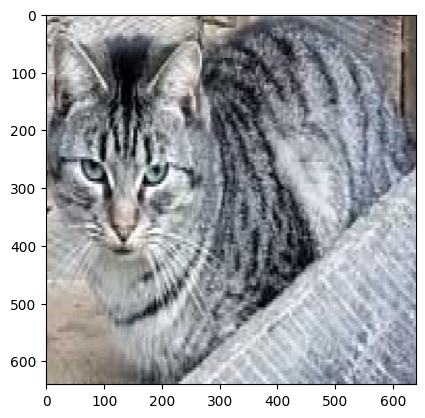

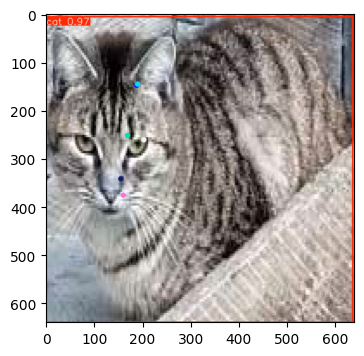

In [11]:
i += 1
new_image = Image.open(image_paths[i])
fileID = image_paths[i].split('/')[-1].split('.')[0]
print('Index {}, file ID {}'.format(i, fileID))
plt.imshow(plt.imread(image_paths[i]))
new_results = trained_model.predict(new_image, conf=CONFIDENCE_THRESHOLD, iou=0.5)
new_result_array = new_results[0].plot()
plt.figure(figsize=(4,4))
plt.imshow(new_result_array);

In [11]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
def pil_to_cv2(image):
  """
  Converts a PIL image to a OpenCV image.

  Args:
      image: A PIL image object.

  Returns:
      A OpenCV image object.
  """
  # Convert the PIL image to a NumPy array
  new_array = np.array(image)

  # Convert the color space from RGB (PIL) to BGR (OpenCV)
  if new_array.shape[-1] == 3:  # Check if it has 3 channels
    new_array = cv2.cvtColor(new_array, cv2.COLOR_RGB2BGR)

  # Return the OpenCV image
  return new_array


In [32]:
# See https://www.w3schools.com/colors/colors_picker.asp for colors
# All colors are expressed as RGB triples

color_black = (0,0,0)
color_dark_blue = (0, 64, 255)
color_red = (255,0,0)
color_light_green = (128,255,0)
color_purple = (191,0,255)
color_bluegreen = (0,255,255)
color_tan = (255,128,0)
color_white = (255,255,255)

# Turn RGB triple into BGR triple for use in OpenCV
def bgr(rgb_triple):
  return rgb_triple[::-1]

# Each dict defines features of a keypoint.
#   "rgb":    The RGB tuple for the color to display
#   "bgr":    The BGR tuple for the color to display
#   "name":   The name of this keypoint
#   "abbrev": The abbreviation for this keypoint
#   "coords": The (x,y) coordinates of the keypoint.  (0,0) means this one
#               was not found.
#   "next_keypoints":
#             A tuple of the successor keypoints from this one.  If there are
#               no successors, this is empty.  The keypoint(s) are referred to
#               by their "name" value(s).  There is no significance to the
#               ordering of the keypoints in this tuple.


# The KEYPOINTS tuple ordering is simply a guess based on the order of the
# points as drawn in the Roboflow class skeleton diagram.  It may be completely
# wrong.  But seeing the keypoints drawn on some of the cats suggests that if
# it's wrong, it's not far off from being right.  The ordering of keypoints
# in the Roboflow "edit visibility" panel does not give a reasonable ordering
# when displayed on a cat image.
KEYPOINTS = [
    {
        "name": "right_earbase",
        "abbrev": "rb",
        "rgb": color_black,
        "bgr": bgr(color_black),
        "next_keypoints": ["right_eye", "left_earbase"]
    },
    {
        "name": "left_earbase",
        "abbrev": "lb",
        "rgb": color_black,
        "bgr": bgr(color_black),
        "next_keypoints": ["left_eye"]
    },
    {
        "name": "right_eye",
        "abbrev": "ry",
        "rgb": color_dark_blue,
        "bgr": bgr(color_dark_blue),
        "next_keypoints": ["nose"]
    },
    {
        "name": "left_eye",
        "abbrev": "ly",
        "rgb": color_dark_blue,
        "bgr": bgr(color_dark_blue),
        "next_keypoints": ["nose"]
    },
    {
        "name": "nose",
        "abbrev": "n",
        "rgb": color_red,
        "bgr": bgr(color_red),
        "next_keypoints": ["mouth"]
    },
    {
        "name": "mouth",
        "abbrev": "m",
        "rgb": color_light_green,
        "bgr": bgr(color_light_green),
        "next_keypoints": []
    }
]

# Return a keypoint for a given index in the KEYPOINTS list
def find_keypoint(index):
  return KEYPOINTS[index]

# Return a keypoint with a given name
def find_keypoint_by_name(name):
  for keypoint in KEYPOINTS:
    if keypoint["name"] == name:
      return keypoint
  return None

# Return the list of named next keypoints for a keypoint
# at a given index in the KEYPOINTS list
def get_next_keypoints(index):
  return list(KEYPOINTS[index]["next_keypoints"])

# Get a keypoint;s abbreviation
def get_keypoint_abbrev(index):
  return KEYPOINTS[index]["abbrev"]

# Get a keypoint's RGB colors
def get_keypoint_rgb(index):
  return KEYPOINTS[index]["rgb"]

# Get a keypoint's BGR colors, given the keypoint index
def get_keypoint_bgr(index):
  return KEYPOINTS[index]["bgr"]

# Get a keypoint's BGR colors from the keypoint dict itself
def get_keypoint_bgr_from_keypoint(keypoint):
  return keypoint["bgr"]

# Get the keypoint name, given its index
def get_keypoint_name(index):
  return KEYPOINTS[index]["name"]

# Get the keypoint (x,y) coordinates, given its index
def get_keypoint_coords(index):
  return KEYPOINTS[index]["coords"]

# Get the keypoint (x,y) coordinates, given the keypoint dict itself
def get_keypoint_coords_from_keypoint(keypoint):
  return keypoint["coords"]

# Set the (x,y) coordinates of the keypoint at a given index
def set_keypoint_coords(index, coords):
  KEYPOINTS[index]["coords"] = coords

# Draw the keypoint at an index onto an image
def draw_keypoint_abbrev(index, image):
  x, y = get_keypoint_coords(index)
  if x > 0 and y > 0:
    cv2.putText(image, get_keypoint_abbrev(index), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, get_keypoint_bgr(index), 2, cv2.LINE_AA)

# Draw a filled dot at a keypoint
def draw_keypoint_dot(index, image):
  x,y = get_keypoint_coords(index)
  if x > 0 and y > 0:
    image = cv2.circle(image, (x,y), radius=0, color=get_keypoint_bgr(index), thickness=-1)

# Draw the connections of the keypoint at a given index onto an image
def draw_keypoint_connections(index, image):
  x, y = get_keypoint_coords(index)
  if x > 0 and y > 0:
    for next_keypoint_name in get_next_keypoints(index):
      next_keypoint = find_keypoint_by_name(next_keypoint_name)
      next_x, next_y = get_keypoint_coords_from_keypoint(next_keypoint)
      color_of_next_keypoint = get_keypoint_bgr_from_keypoint(next_keypoint)
      if next_x > 0 and next_y > 0:
        cv2.line(image, (x,y), (next_x, next_y), color_of_next_keypoint, 2)

In [27]:
!unzip Torre_Argentina_cats_segmented.zip

Archive:  Torre_Argentina_cats_segmented.zip
   creating: Torre_Argentina_cats_segmented/
  inflating: Torre_Argentina_cats_segmented/IMG_1051_cat-4.png  
  inflating: Torre_Argentina_cats_segmented/IMG_1050_cat-1.png  
  inflating: Torre_Argentina_cats_segmented/IMG_1047_cat-0.png  
  inflating: Torre_Argentina_cats_segmented/IMG_1054_cat-0.png  
  inflating: Torre_Argentina_cats_segmented/IMG_1051_cat-3.png  
  inflating: Torre_Argentina_cats_segmented/IMG_1051_cat-1.png  
  inflating: Torre_Argentina_cats_segmented/IMG_1052_cat-1.png  
  inflating: Torre_Argentina_cats_segmented/IMG_1051_cat-2.png  
  inflating: Torre_Argentina_cats_segmented/IMG_1048_cat-0.png  
  inflating: Torre_Argentina_cats_segmented/IMG_1052_cat-2.png  
  inflating: Torre_Argentina_cats_segmented/IMG_1057_cat-0.png  
  inflating: Torre_Argentina_cats_segmented/IMG_1051_cat-0.png  
  inflating: Torre_Argentina_cats_segmented/IMG_1046_cat-2.png  
  inflating: Torre_Argentina_cats_segmented/IMG_1049_cat-0.png  


In [7]:
import glob
image_paths = []
# get all image paths in validation dataset
for path in glob.glob('/content/Azores_cats_segmented/*.png'):
    image_paths.append(path)
# sort image_path
image_paths.sort()
image_paths

['/content/Azores_cats_segmented/IMG_1899_cat-0.png',
 '/content/Azores_cats_segmented/IMG_1900_cat-0.png',
 '/content/Azores_cats_segmented/IMG_1901_cat-0.png',
 '/content/Azores_cats_segmented/IMG_1901_cat-1.png',
 '/content/Azores_cats_segmented/IMG_1905_cat-0.png',
 '/content/Azores_cats_segmented/IMG_1907_cat-0.png',
 '/content/Azores_cats_segmented/IMG_1908_cat-0.png',
 '/content/Azores_cats_segmented/IMG_1908_cat-1.png',
 '/content/Azores_cats_segmented/IMG_1911_cat-0.png',
 '/content/Azores_cats_segmented/IMG_1911_cat-1.png']

In [44]:
i = -1

0 /content/Azores_cats_segmented/IMG_1899_cat-0.png

0: 640x640 1 cat, 38.6ms
Speed: 3.8ms preprocess, 38.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/pose/predict
Keypoint:  ultralytics.engine.results.Keypoints object with attributes:

conf: array([[    0.74273,     0.79833,      0.8318,     0.82798,     0.78282,       0.682]], dtype=float32)
data: array([[[     38.463,      18.577,     0.74273],
        [     38.625,       19.36,     0.79833],
        [     39.156,      27.692,      0.8318],
        [     39.926,      27.921,     0.82798],
        [      40.59,      34.124,     0.78282],
        [     40.539,      36.265,       0.682]]], dtype=float32)
has_visible: True
orig_shape: (56, 58)
shape: (1, 6, 3)
xy: array([[[     38.463,      18.577],
        [     38.625,       19.36],
        [     39.156,      27.692],
        [     39.926,      27.921],
        [      40.59,      34.124],
        [     40.539,      36.265]]], dtype=float32

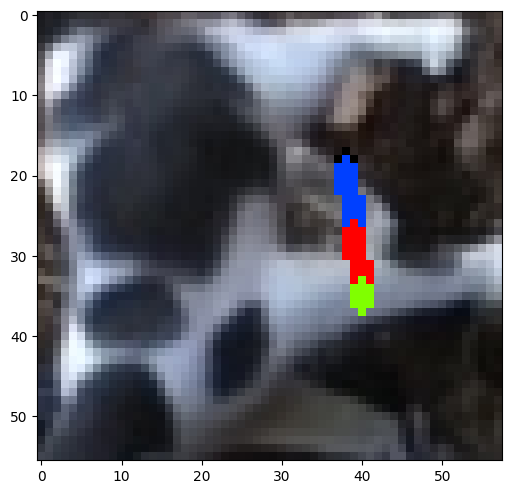

In [45]:
CONFIDENCE_THRESHOLD = 0.3
i += 1
# Load the image
print(i, image_paths[i])
image = cv2.imread(image_paths[i])

# Predict the keypoints for each class (there's only one class: cat)
results = trained_model.predict(image, conf=CONFIDENCE_THRESHOLD, iou=0.5, save=True)

# Loop through each detected object
for result in results:
  original_image = result.orig_img # numpy array
  # Check if keypoints are available
  if hasattr(result, "keypoints"):
    keypoint_set_for_cat_class = result.keypoints[0].cpu().numpy()  # Assuming only one class
                                                                    # is detected (cat)

    # Draw keypoint's abbreviation on each keypoint location
    for kp in keypoint_set_for_cat_class:
      print('Keypoint: ', kp)
      for index, coords in enumerate(kp.xy[0]):
        x, y = int(coords[0]), int(coords[1])  # Extract x and y coordinates
        set_keypoint_coords(index, (x,y))
        print(f'Index {index} has coordinates ({x},{y})')
        if x > 0 and y > 0:
          #draw_keypoint_abbrev(index, image)
          draw_keypoint_dot(index, image)

    # Draw lines between keypoints
    for kp in keypoint_set_for_cat_class:
     for index, _ in enumerate(kp.xy[0]):
       draw_keypoint_connections(index, image)

# Display the original image with keypoints
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert the color space from BGR (OpenCV) to RGB (matplotlib)
plt.figure(figsize=(6,6))
plt.imshow(rgb_image)
plt.show()

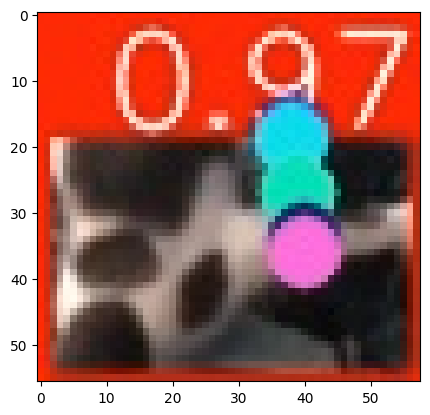

In [50]:
# Display the saved image

image = cv2.imread('runs/pose/predict/image0.jpg')
plt.imshow(image)  # adjust the path based on your saved output